In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [26]:
df=pd.read_csv('HR_comma_sep.csv',encoding='utf-8')

In [27]:
df


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
6909,0.47,0.47,4,191,3,0,0,0,technical,medium
6910,0.88,1.00,3,125,3,0,0,0,technical,medium
6911,0.49,0.43,5,210,4,1,0,0,technical,medium
6912,0.92,0.67,4,241,3,0,0,0,technical,high


# CLEAN DF


In [28]:
def reading_cleaning(df):
    df.drop_duplicates(inplace=True)
    cols=df.columns.tolist()
    df.columns=[x.lower() for x in cols]
    
    return df

df=reading_cleaning(df)
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# EMPLOYEE DETAILS

In [29]:
df['satisfaction_level'].mean()
df.groupby('department')['satisfaction_level'].mean()
df.groupby('salary')['satisfaction_level'].mean()
df['left'].value_counts()

0    4914
1    1991
Name: left, dtype: int64

In [30]:
def employee_important_info(df):
    average_satisfaction=df['satisfaction_level'].mean()
    department_satisfaction=df.groupby('department')['satisfaction_level'].mean()
    salary_satisfaction=df.groupby('salary')['satisfaction_level'].mean()
    
    left_employees=len(df[df['left']==1])
    
    stayed_employees=len(df[df['left']==0])
    
    return average_satisfaction,department_satisfaction,salary_satisfaction,left_employees,stayed_employees


In [31]:
average_satisfaction,department_satisfaction,salary_satisfaction,left_employees,stayed_employees=employee_important_info(df)

In [32]:
print(" average_satisfaction level:",average_satisfaction)
print("department wise_satisfaction level:\n",department_satisfaction) 
print('salary wise average satisfaction level\n',salary_satisfaction)
print("employees who left\n",left_employees)
print("employees who stayed\n",stayed_employees)

 average_satisfaction level: 0.6025083272990567
department wise_satisfaction level:
 department
IT             0.596568
RandD          0.606976
accounting     0.578370
hr             0.595282
management     0.599833
marketing      0.605653
product_mng    0.607022
sales          0.601585
support        0.614926
technical      0.601670
Name: satisfaction_level, dtype: float64
salary wise average satisfaction level
 salary
h         0.240000
high      0.627799
low       0.592670
medium    0.610444
Name: satisfaction_level, dtype: float64
employees who left
 1991
employees who stayed
 4914


# Pie plot fro employee different features

([<matplotlib.patches.Wedge at 0x168e903d220>,
 [Text(-0.6787165447717675, 0.8656464935833066, ''),
  Text(0.6787166258194386, -0.8656464300372736, '')],
 [Text(-0.37020902442096404, 0.47217081468180355, '71.2%'),
  Text(0.3702090686287846, -0.47217078002033097, '28.8%')])

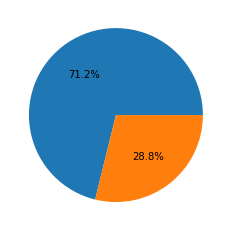

In [33]:
plt.pie(df['left'].value_counts(),autopct="%1.1f%%")

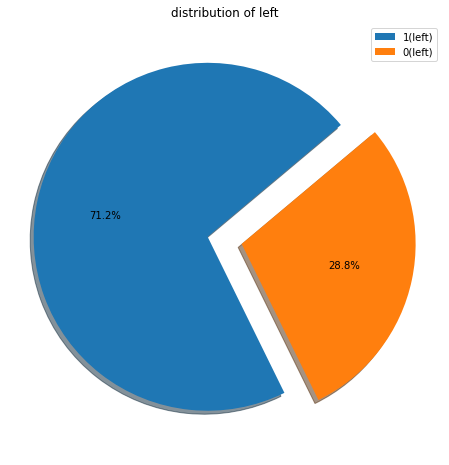

In [34]:
def plots(df,col):
    values=df[col].unique()
    plt.figure(figsize=(15,8))
    
    explode=[0.1 if len(values)>1 else 0]*len(values)
    plt.pie(df[col].value_counts(),explode=explode,startangle=40,autopct='%1.1f%%',shadow=True)
    labels=[f'{value}({col})' for value in values]
    plt.legend(labels=labels,loc='upper right')
    
    plt.title(f'distribution of {col}')
    plt.show()
    
plots(df,'left')
    

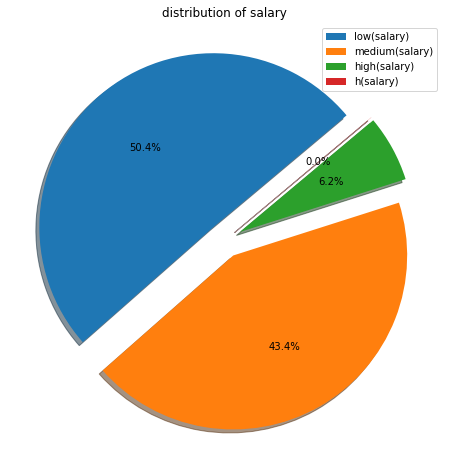

In [35]:
plots(df,'salary')

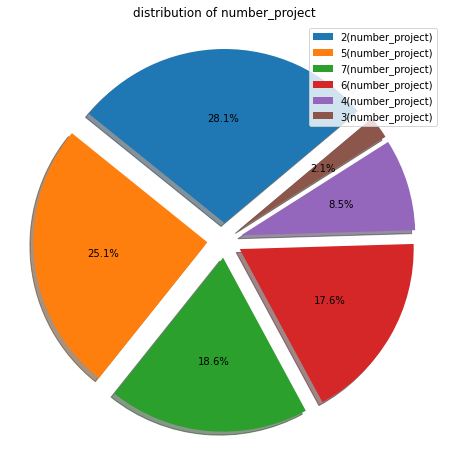

In [36]:
plots(df,'number_project')

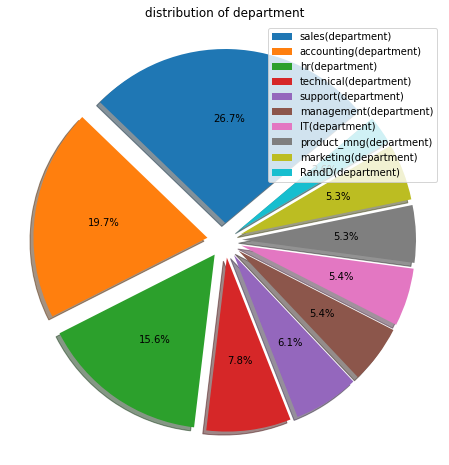

In [37]:
plots(df,'department')

# Employee distribution

<AxesSubplot:xlabel='salary', ylabel='count'>

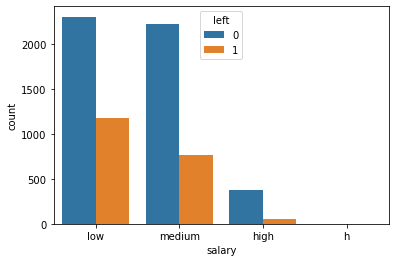

In [38]:
sns.countplot(x=df['salary'],hue='left',data=df)

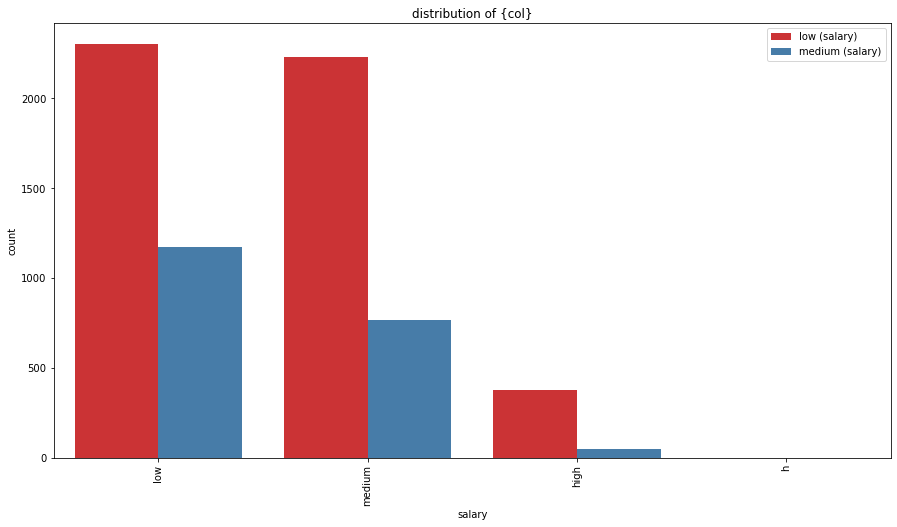

In [39]:
def distribution(df,col):
    values=df[col].unique()
    plt.figure(figsize=(15,8))
    sns.countplot(x=df[col],hue='left',palette='Set1',data=df)
    labels=[f'{val} ({col})' for val in values]
    plt.legend(labels=labels,loc='upper right')
    plt.title('distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()
    
distribution(df,'salary')

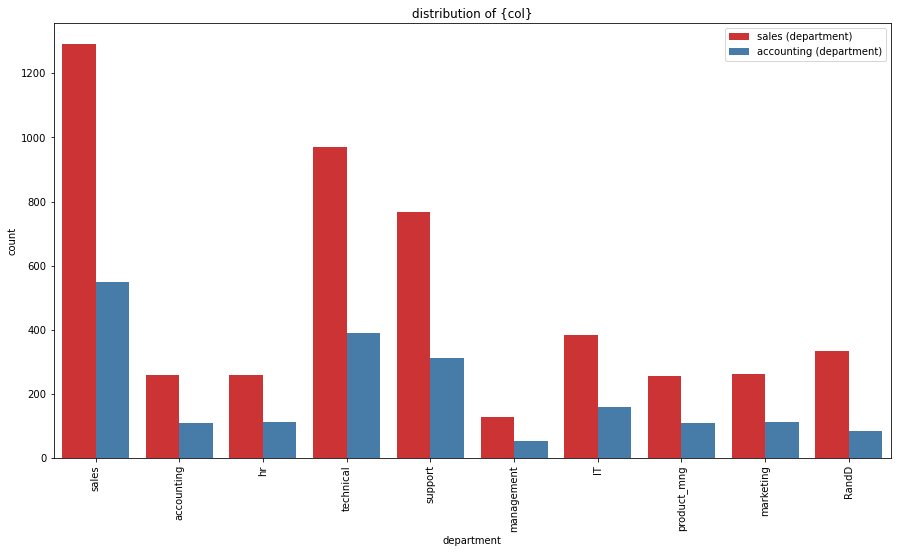

In [40]:
distribution(df,'department')

# Comparison

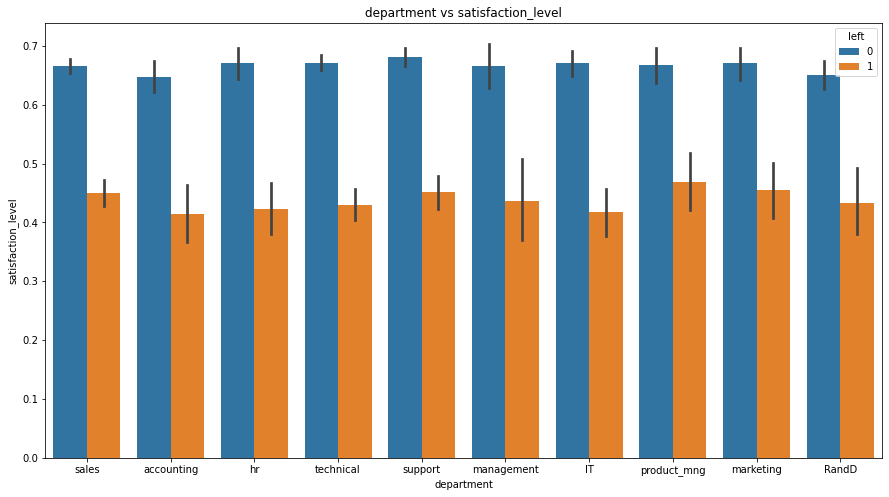

In [41]:
def comparison(df,x,y):
    plt.figure(figsize=(15,8))
    sns.barplot(x=x,y=y,hue='left',data=df)
    plt.title(f'{x} vs {y}')
    plt.show()
comparison(df,'department','satisfaction_level')

# Feature left correlation

In [42]:
pd.get_dummies(df)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_h,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,0.47,0.47,4,191,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6910,0.88,1.00,3,125,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6911,0.49,0.43,5,210,4,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6912,0.92,0.67,4,241,3,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


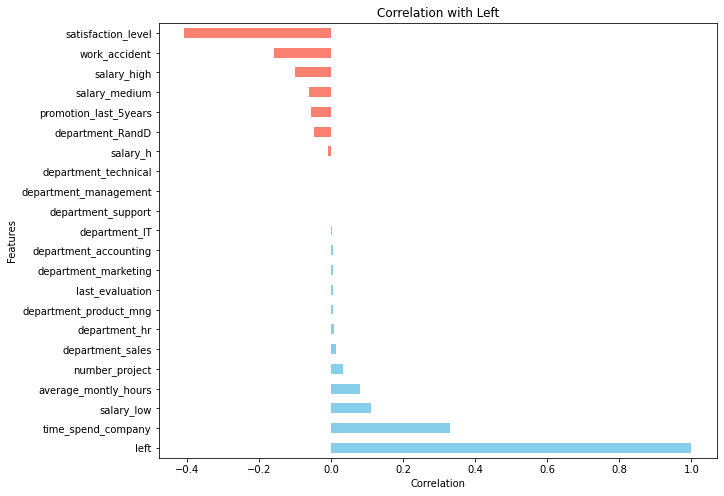

In [43]:
def corr_with_left(df):
    df_encoded = pd.get_dummies(df)
    correlations = df_encoded.corr()['left'].sort_values()[::-1]
    colors = ['skyblue' if corr > 0 else 'salmon' for corr in correlations]

    plt.figure(figsize=(10, 8))
    correlations.plot(kind='barh', color=colors)

    # Add title and labels
    plt.title('Correlation with Left')
    plt.xlabel('Correlation')
    plt.ylabel('Features')

    # Show the plot
    plt.show()

corr_with_left(df)


# Employee churn analysis

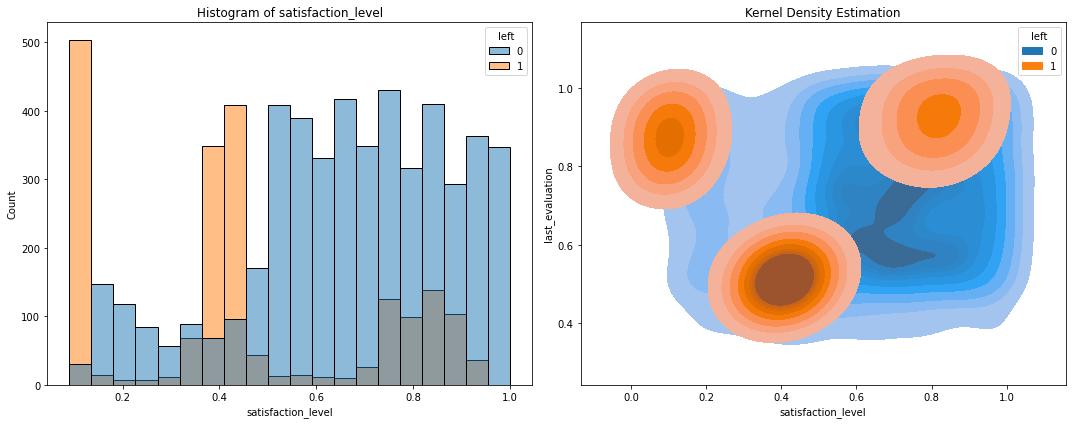

In [46]:
def histogram(df, col):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Create a grid of 1 row and 2 columns

    # Plot the first histogram
    sns.histplot(data=df, x=col, hue='left', bins=20, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')

    # Plot the second histogram
    sns.kdeplot(data=df, x='satisfaction_level', y='last_evaluation', hue='left', shade=True, ax=axes[1])
    axes[1].set_title('Kernel Density Estimation')

    plt.tight_layout()  # Adjust the layout to prevent overlapping
    plt.show()

histogram(df, 'satisfaction_level')

